In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1. Data Understanding

In [ ]:
!curl -L -o FINAL_DATASET_with_Humidity_and_Station.xlsx "https://gitlab.com/JPratama7/wa-bot-be/-/raw/main/FINAL_DATASET_with_Humidity_and_Station.xlsx?ref_type=heads"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35995  100 35995    0     0   246k      0 --:--:-- --:--:-- --:--:--  245k


In [ ]:
# Path ke file Excel
file_path = '/content/FINAL_DATASET_with_Humidity_and_Station.xlsx'

df = pd.read_excel(file_path)

In [ ]:
df

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Station,Humidity
0,Cilacap,2013,1322,1255.75075,9.498871,Kacang Tanah,"Meteorologi, Cilacap",82.0
1,Banyumas,2013,1671,2172.471503,13.001026,Kacang Tanah,NaN,NaN
2,Purbalingga,2013,731,780.888185,10.682465,Kacang Tanah,NaN,NaN
3,Banjarnegara,2013,2278,1970.754694,8.65125,Kacang Tanah,NaN,NaN
4,Kebumen,2013,2202,1938.738197,8.804442,Kacang Tanah,"Sempor, Kebumen",84.0
...,...,...,...,...,...,...,...,...
732,Kota Surakarta,2022,27.00,156.00,57.78,Padi,NaN,NaN
733,Kota Salatiga,2022,650.00,3614.00,55.60,Padi,NaN,NaN
734,Kota Semarang,2022,3027.00,15691.00,51.84,Padi,NaN,NaN
735,Kota Pekalongan,2022,1351.00,7684.00,56.88,Padi,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kabupaten      737 non-null    object 
 1   Tahun          737 non-null    int64  
 2   Luas Panen     737 non-null    object 
 3   Hasil Panen    737 non-null    object 
 4   Produktivitas  737 non-null    object 
 5   Tanaman        737 non-null    object 
 6   Station        256 non-null    object 
 7   Humidity       256 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 46.2+ KB


In [ ]:
df['Kabupaten'] = df['Kabupaten'].str.replace('Kab. ', '')
df['Kabupaten'] = df['Kabupaten'].str.replace('Kabupaten ', '')

In [ ]:
df[df['Kabupaten'].str.contains('Kota', case=False, na=False)]

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Station,Humidity
30,Kota Magelang,2013,0,0,0,Kacang Tanah,NaN,NaN
31,Kota Surakarta,2013,9,6.334032,7.037813,Kacang Tanah,NaN,NaN
32,Kota Salatiga,2013,0,0,0,Kacang Tanah,NaN,NaN
33,Kota Semarang,2013,341,422.075691,12.377586,Kacang Tanah,NaN,NaN
34,Kota Pekalongan,2013,0,0,0,Kacang Tanah,NaN,NaN
...,...,...,...,...,...,...,...,...
732,Kota Surakarta,2022,27.00,156.00,57.78,Padi,NaN,NaN
733,Kota Salatiga,2022,650.00,3614.00,55.60,Padi,NaN,NaN
734,Kota Semarang,2022,3027.00,15691.00,51.84,Padi,NaN,NaN
735,Kota Pekalongan,2022,1351.00,7684.00,56.88,Padi,NaN,NaN


In [ ]:
df[df['Kabupaten'].str.contains('Kabupaten', case=False, na=False)]

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Station,Humidity


In [ ]:
df[df['Kabupaten'].str.contains('Kab. ', case=False, na=False)]

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Station,Humidity


In [ ]:
df.drop(columns=['Station'], inplace=True)

In [ ]:
df.isnull().sum()

Kabupaten          0
Tahun              0
Luas Panen         0
Hasil Panen        0
Produktivitas      0
Tanaman            0
Humidity         481
dtype: int64

In [ ]:
df.isna().sum()

Kabupaten          0
Tahun              0
Luas Panen         0
Hasil Panen        0
Produktivitas      0
Tanaman            0
Humidity         481
dtype: int64

# 2. Pre-Processing Data

## 2.1 Mengubah Tipe Data Variabel Menjadi Integer

In [ ]:
# Membuat function change data type
def clean_data(value):
    if not isinstance(value, str):
      if isinstance(value, int):
        return float(value)
      if isinstance(value, float):
        return value
      return np.nan
    if value == '-':
        return np.nan

    rb = value.split(",", 1)
    if len(rb) > 1:
        value = rb[0] + "." + rb[1]
    elif len(rb) == 1:
        value = rb[0]
    return float(value.replace(',', '.').replace(' ', '').strip())

In [ ]:
df['Luas Panen'] = df['Luas Panen'].apply(clean_data)
df['Hasil Panen'] = df['Hasil Panen'].apply(clean_data)
df['Produktivitas'] = df['Produktivitas'].apply(clean_data)

In [ ]:
df.head()

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Humidity
0,Cilacap,2013,1322.0,1255.750750,9.498871,Kacang Tanah,82.0
1,Banyumas,2013,1671.0,2172.471503,13.001026,Kacang Tanah,NaN
2,Purbalingga,2013,731.0,780.888185,10.682465,Kacang Tanah,NaN
3,Banjarnegara,2013,2278.0,1970.754694,8.651250,Kacang Tanah,NaN
4,Kebumen,2013,2202.0,1938.738197,8.804442,Kacang Tanah,84.0


## 2.2 Interpolate Data NaN

In [ ]:
df.isna().sum()

Kabupaten          0
Tahun              0
Luas Panen        49
Hasil Panen       49
Produktivitas     49
Tanaman            0
Humidity         481
dtype: int64

In [ ]:
# df['Luas Panen'] = df['Luas Panen'].interpolate(method='spline', order=2, limit_direction='both')
# df['Hasil Panen'] = df['Hasil Panen'].interpolate(method='spline', order=2, limit_direction='both')
# df['Produktivitas'] = df['Produktivitas'].interpolate(method='spline', order=2, limit_direction='both')
# df['Humidity'] = df['Humidity'].interpolate(method='spline', order=2, limit_direction='both')

In [ ]:
df['Luas Panen'] = df['Luas Panen'].interpolate(method='pchip', limit_direction='both')
df['Hasil Panen'] = df['Hasil Panen'].interpolate(method='pchip', limit_direction='both')
df['Produktivitas'] = df['Produktivitas'].interpolate(method='pchip', limit_direction='both')
df['Humidity'] = df['Humidity'].interpolate(method='pchip', limit_direction='both')

In [ ]:
df.isna().sum()

Kabupaten        0
Tahun            0
Luas Panen       0
Hasil Panen      0
Produktivitas    0
Tanaman          0
Humidity         0
dtype: int64

## 2.3 Encoding

In [ ]:
encoder = LabelEncoder()
df['Tanaman'] = encoder.fit_transform(df['Tanaman'])
df['Kabupaten'] = encoder.fit_transform(df['Kabupaten'])

## 2.4 Scalar


In [ ]:
scaler = MinMaxScaler()
columns_to_scale = ['Luas Panen', 'Hasil Panen', 'Produktivitas', 'Humidity']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

## 2.5 Visualisasi Data

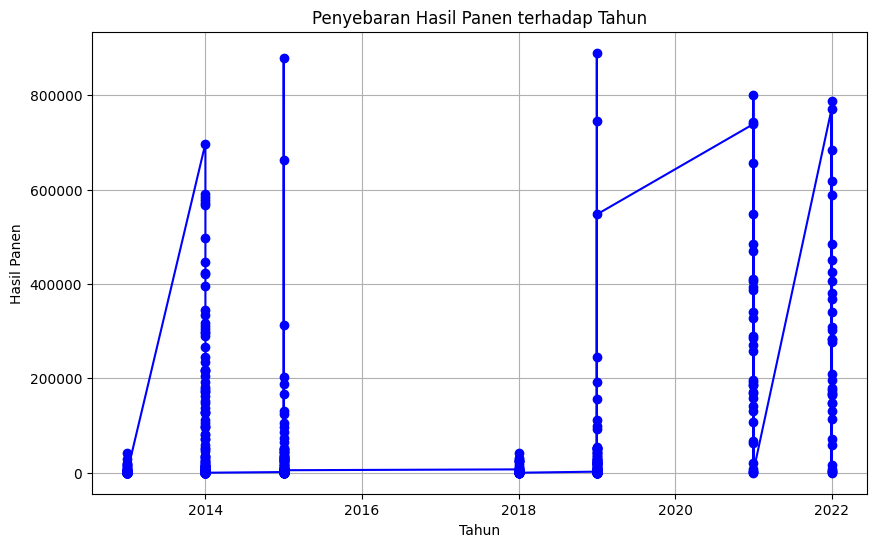

In [ ]:
# Penyebaran Hasil Panen Terhadap Tahun
import pandas as pd
import matplotlib.pyplot as plt

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Tahun'], df['Hasil Panen'], marker='o', linestyle='-', color='b')

# Memberi judul dan label
plt.title('Penyebaran Hasil Panen terhadap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Hasil Panen')

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.show()

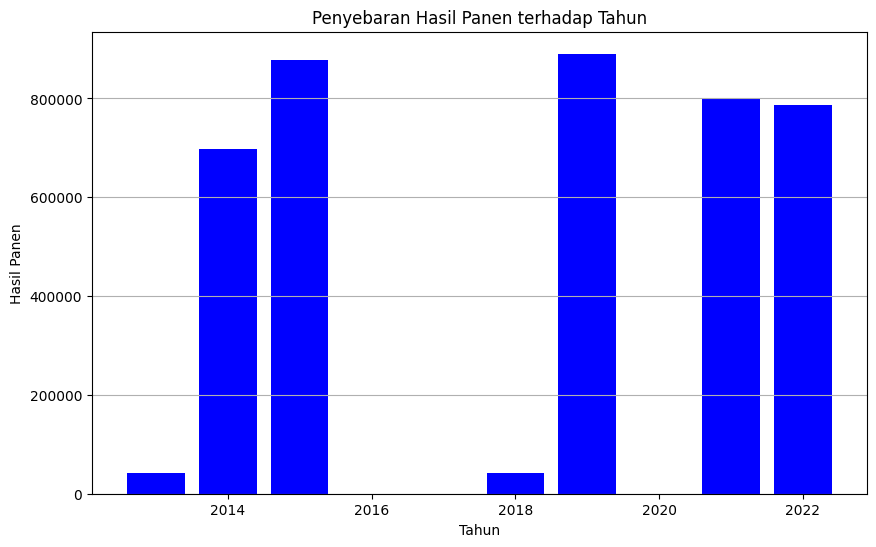

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Tahun'], df['Hasil Panen'], color='b')

# Memberi judul dan label
plt.title('Penyebaran Hasil Panen terhadap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Hasil Panen')

# Menambahkan grid
plt.grid(axis='y')

# Menampilkan chart
plt.show()


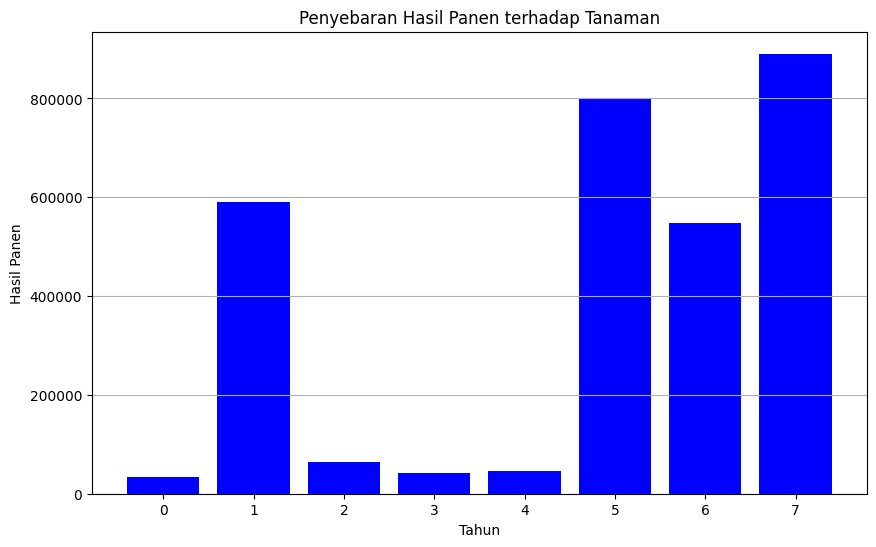

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Tanaman'], df['Hasil Panen'], color='b')

# Memberi judul dan label
plt.title('Penyebaran Hasil Panen terhadap Tanaman')
plt.xlabel('Tahun')
plt.ylabel('Hasil Panen')

# Menambahkan grid
plt.grid(axis='y')

# Menampilkan chart
plt.show()


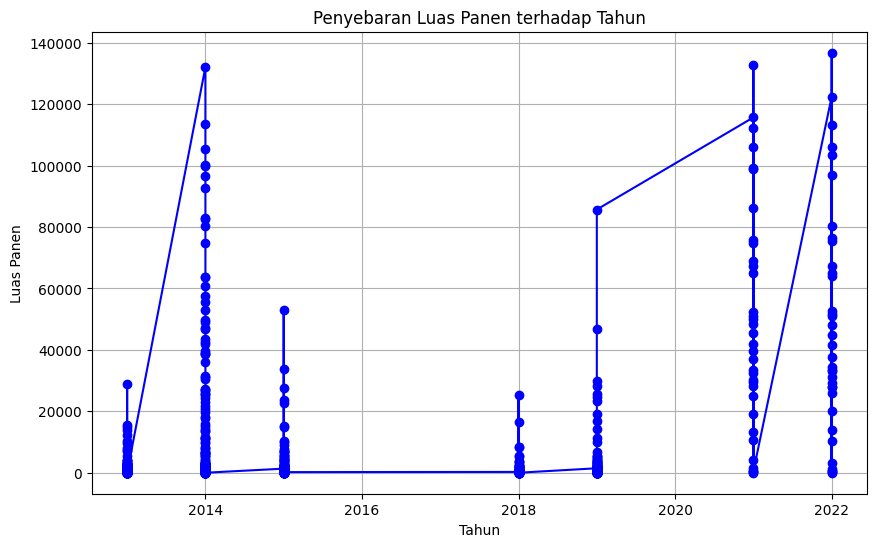

In [ ]:
# Penyebaran Luas Panen Terhadap Tahun
import pandas as pd
import matplotlib.pyplot as plt

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Tahun'], df['Luas Panen'], marker='o', linestyle='-', color='b')

# Memberi judul dan label
plt.title('Penyebaran Luas Panen terhadap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Luas Panen')

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.show()

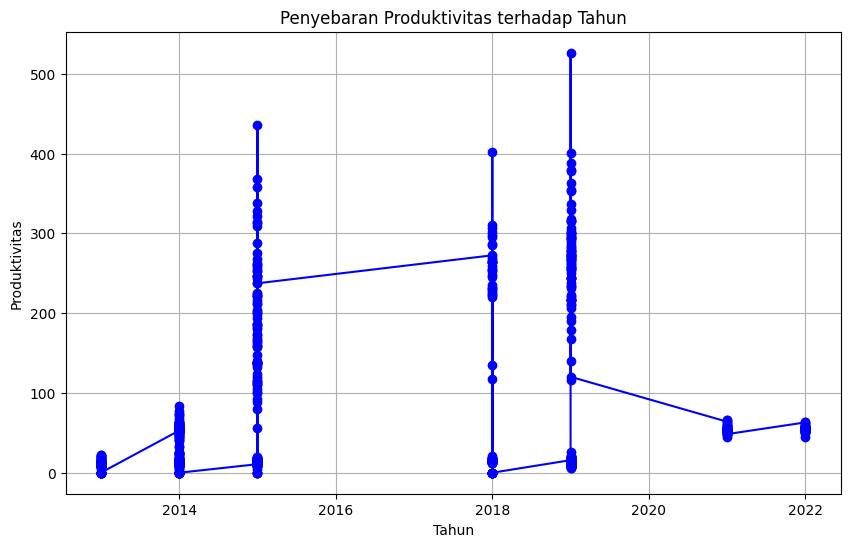

In [ ]:
# Penyebaran Produktivitas Terhadap Tahun
import pandas as pd
import matplotlib.pyplot as plt

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Tahun'], df['Produktivitas'], marker='o', linestyle='-', color='b')

# Memberi judul dan label
plt.title('Penyebaran Produktivitas terhadap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Produktivitas')

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.show()

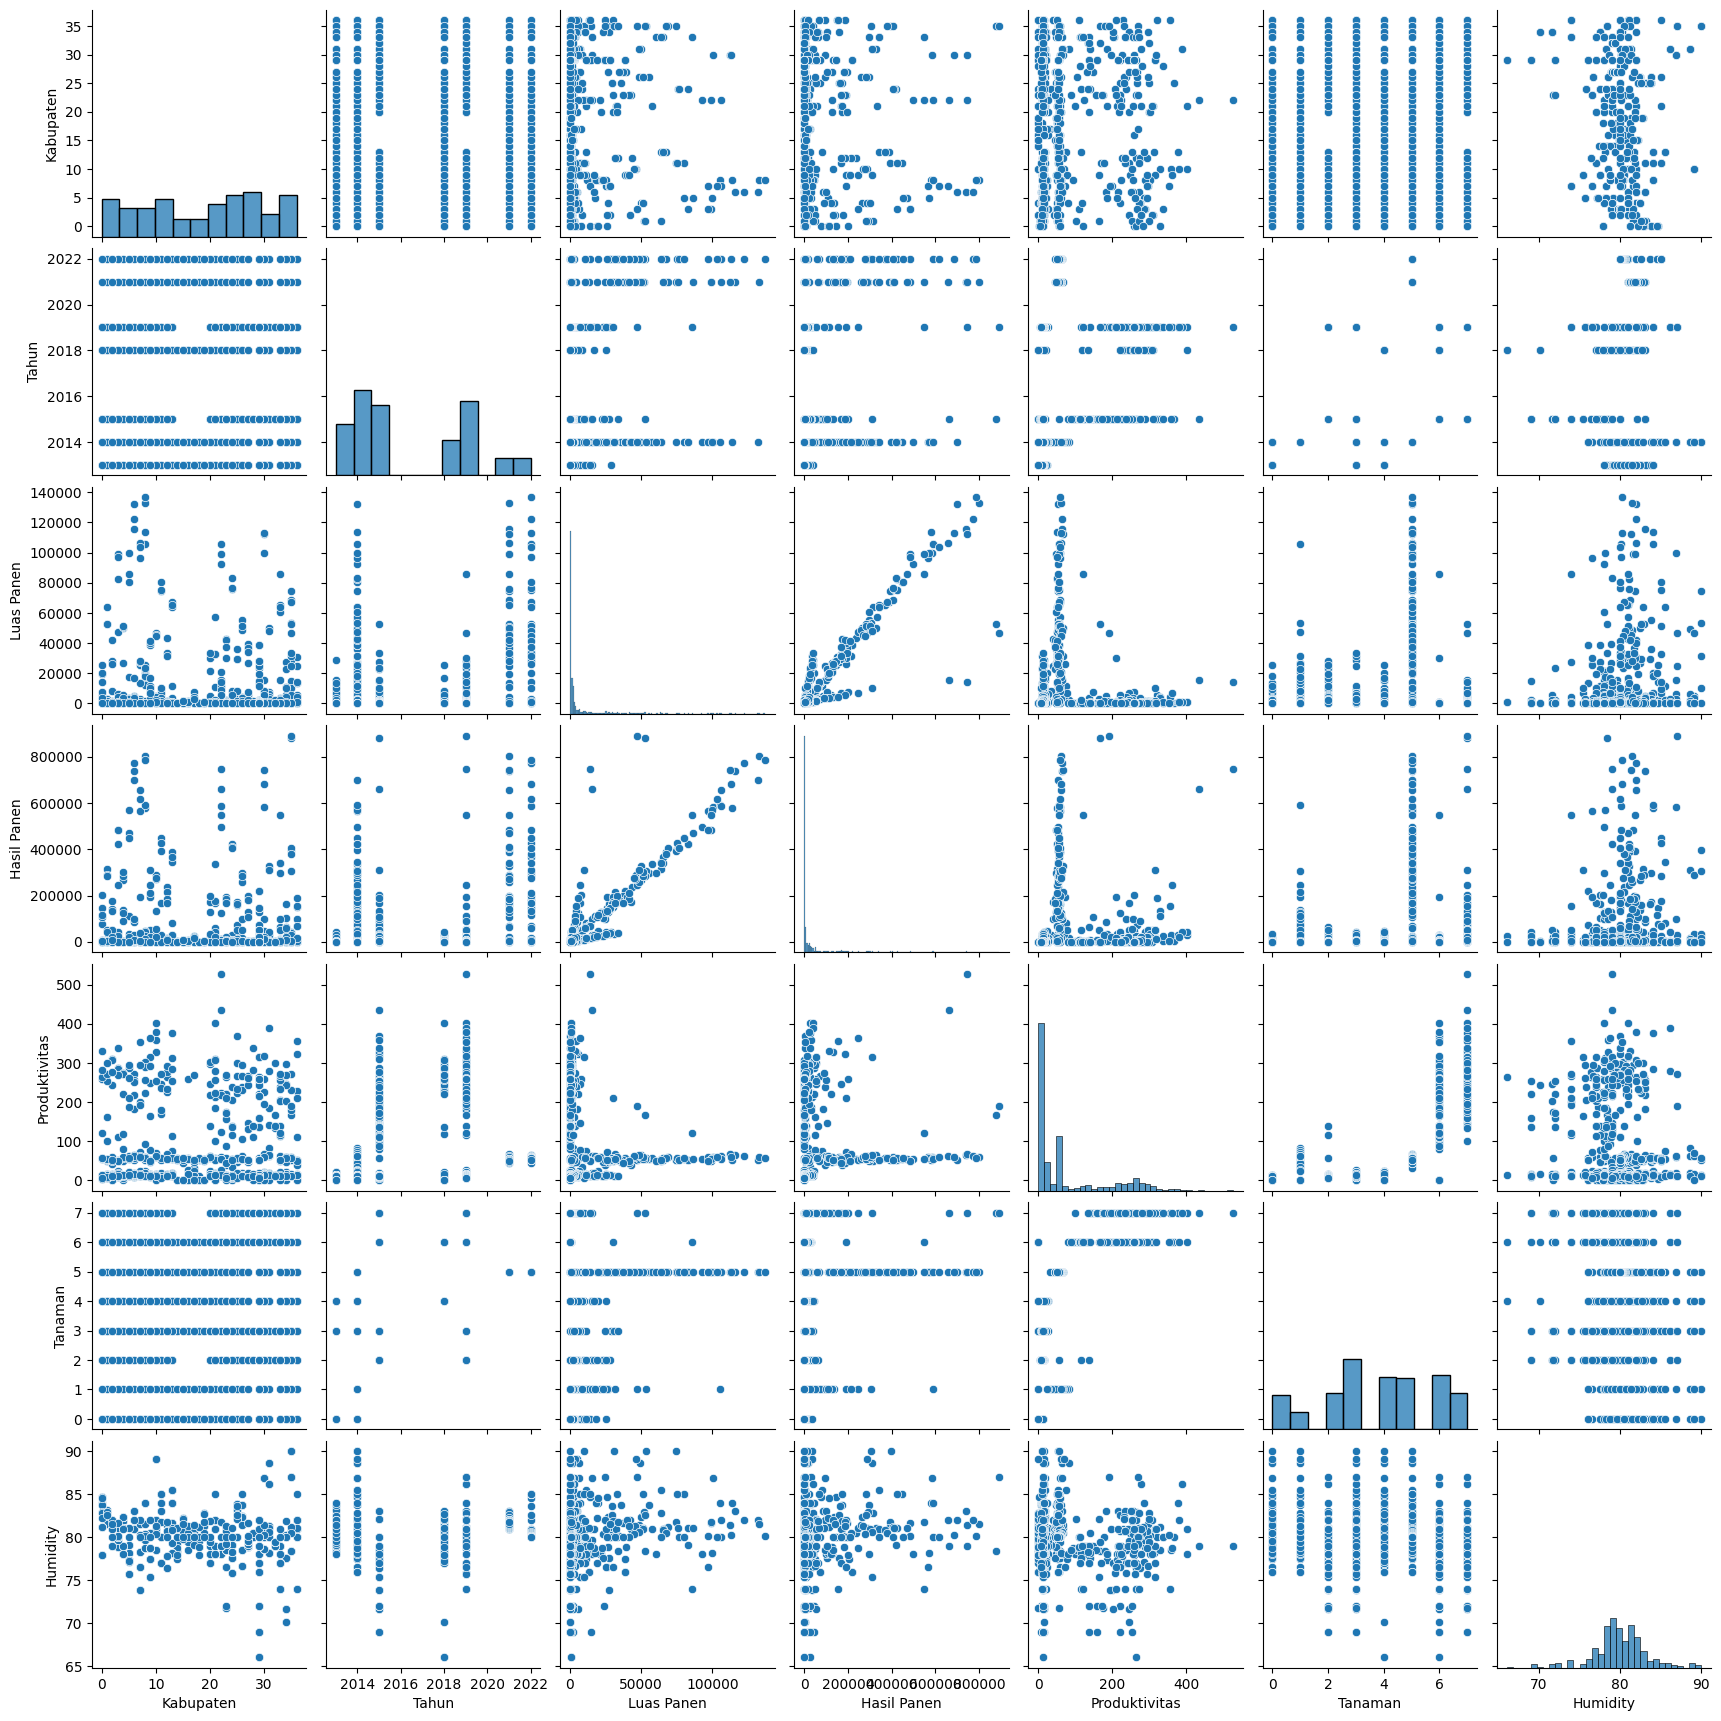

In [ ]:
ax = sns.pairplot(df)
ax

## 2.5 Correlation

In [ ]:
df.corr()

,Kabupaten,Tahun,Luas Panen,Hasil Panen,Produktivitas,Tanaman,Humidity
Kabupaten,1.000000,0.032052,-0.063624,-0.039966,0.017969,0.030315,-0.196074
Tahun,0.032052,1.000000,0.269320,0.275063,0.302033,0.420285,-0.003173
Luas Panen,-0.063624,0.269320,1.000000,0.921853,-0.074187,0.130430,0.173039
Hasil Panen,-0.039966,0.275063,0.921853,1.000000,0.084674,0.226293,0.145379
Produktivitas,0.017969,0.302033,-0.074187,0.084674,1.000000,0.718422,-0.142737
Tanaman,0.030315,0.420285,0.130430,0.226293,0.718422,1.000000,-0.138970
Humidity,-0.196074,-0.003173,0.173039,0.145379,-0.142737,-0.138970,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

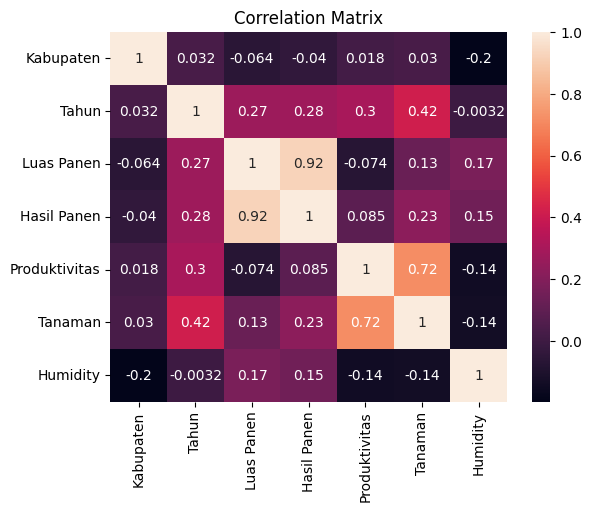

In [ ]:
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

# 3. Modelling

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(["Hasil Panen", "Kabupaten", "Tahun"], axis=1)
y = df["Hasil Panen"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (589, 4)
x_test : (148, 4)
y_train : (589,)
y_test : (148,)


## 3.1 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 110)
rf_model.fit(x_train,y_train)
rf_predict = rf_model.predict(x_test)

In [ ]:
rf_model.score(x_test,y_test)

0.9770461865675835

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=x.columns)
feature_importance.sort_values(ascending=False)

Luas Panen       0.842037
Produktivitas    0.134540
Tanaman          0.019412
Humidity         0.004010
dtype: float64

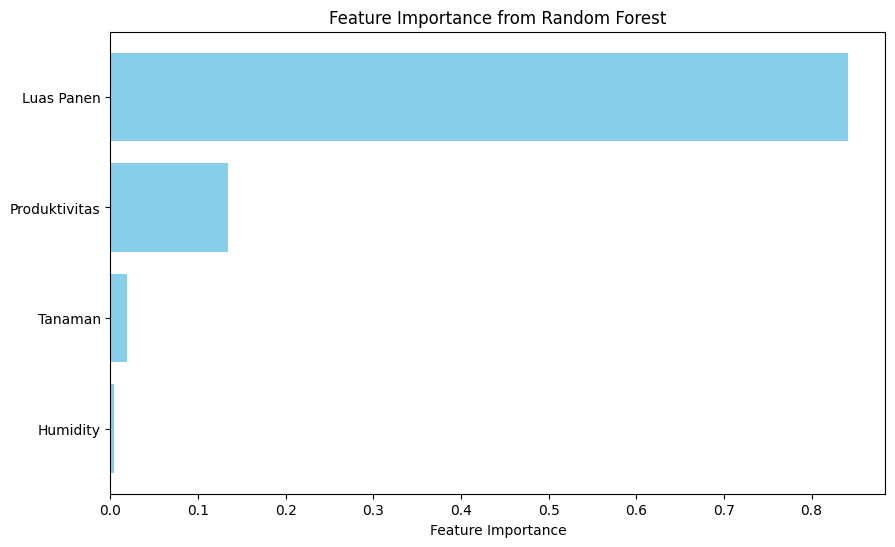

,Feature,Importance
0,Luas Panen,0.842037
1,Produktivitas,0.134540
2,Tanaman,0.019412
3,Humidity,0.004010


In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_
features = x.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display the feature importances DataFrame
feature_importance_df

In [ ]:
# Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

y_pred = rf_model.predict(x_test)

print("R-Squared : ", r2_score(y_test, y_pred))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred))

R-Squared :  0.9770461865675835
MSE :  415608540.9009493
RMSE :  20386.47936503381
MAE :  6048.147762584847
MAPE :  82.93302192513379


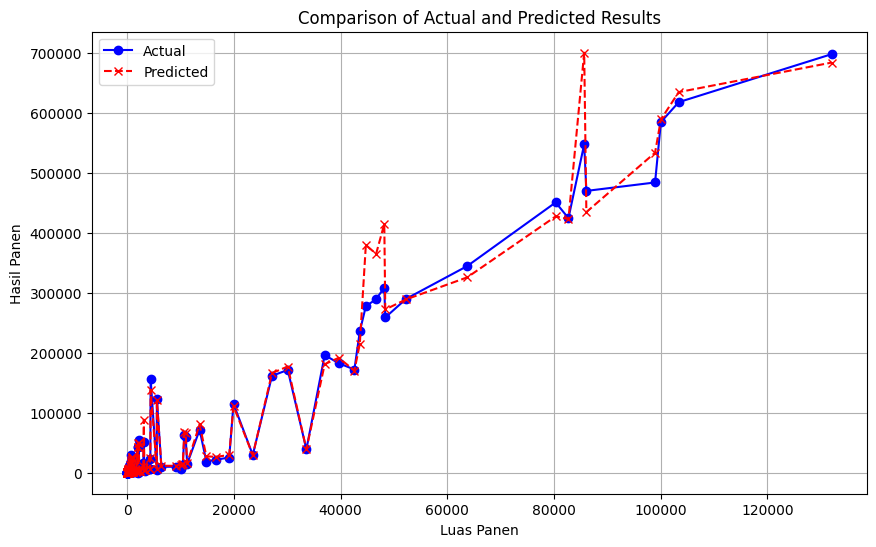

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame untuk memudahkan plotting
df_results = pd.DataFrame({
    'Luas Panen': x_test['Luas Panen'],  # Asumsikan x_test memiliki kolom 'Luas Panen'
    'Actual': y_test,
    'Predicted': rf_predict
})

# Sortir DataFrame berdasarkan Luas Panen jika belum diurutkan
df_results = df_results.sort_values('Luas Panen')

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df_results['Luas Panen'], df_results['Actual'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(df_results['Luas Panen'], df_results['Predicted'], marker='x', linestyle='--', color='r', label='Predicted')

# Memberi judul dan label
plt.title('Comparison of Actual and Predicted Results')
plt.xlabel('Luas Panen')
plt.ylabel('Hasil Panen')
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.show()

## 3.2 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model Linear Regression
lr_model = LinearRegression()

# Melatih model
lr_model.fit(x_train, y_train)

# Memprediksi hasil pada data uji
lr_predict = lr_model.predict(x_test)

In [ ]:
# Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print("R-Squared : ", r2_score(y_test, lr_predict))
print("MSE : ", mean_squared_error(y_test, lr_predict))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, lr_predict)))
print("MAE : ", mean_absolute_error(y_test, lr_predict))
print("MAPE : ", mean_absolute_percentage_error(y_test, lr_predict))

# Mengambil koefisien sebagai feature importance
lr_importance = lr_model.coef_

# Membuat dataframe untuk feature importance
lr_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': lr_importance
})

lr_importance_df

R-Squared :  0.9491219729381972
MSE :  921212619.1290011
RMSE :  30351.484628086993
MAE :  21625.69953591606
MAPE :  5.881426067118879e+18


,Feature,Importance
0,Luas Panen,5.863820
1,Produktivitas,251.069174
2,Tanaman,-1255.618566
3,Humidity,-16.393932


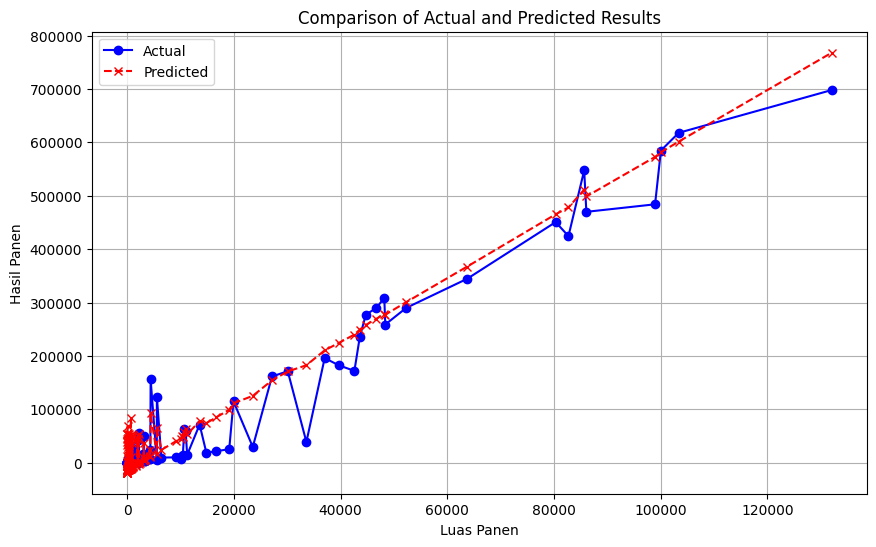

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame untuk memudahkan plotting
df_results = pd.DataFrame({
    'Luas Panen': x_test['Luas Panen'],  # Asumsikan x_test memiliki kolom 'Luas Panen'
    'Actual': y_test,
    'Predicted': lr_predict
})

# Sortir DataFrame berdasarkan Luas Panen jika belum diurutkan
df_results = df_results.sort_values('Luas Panen')

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df_results['Luas Panen'], df_results['Actual'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(df_results['Luas Panen'], df_results['Predicted'], marker='x', linestyle='--', color='r', label='Predicted')

# Memberi judul dan label
plt.title('Comparison of Actual and Predicted Results')
plt.xlabel('Luas Panen')
plt.ylabel('Hasil Panen')
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.show()

## 3.3 Support Vector Machine

In [ ]:
from sklearn.svm import SVR

# Inisialisasi model SVR
svr_model = SVR(kernel='poly', C=100000)  # Anda bisa menggunakan kernel lain seperti 'linear', 'poly', dll.

# Melatih model
svr_model.fit(x_train, y_train)  # Menggunakan y_train.ravel() untuk mengubah bentuk jika diperlukan

# Memprediksi hasil pada data uji
svr_predict = svr_model.predict(x_test)

In [ ]:
# Tuning parameter untuk SVM
# svr = SVR()
# param_grid_svr = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf']}
# grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5)
# grid_search_svr.fit(x_train, y_train)
# best_svr = grid_search_svr.best_estimator_
# print(f"Best SVR Params: {grid_search_svr.best_params_}")
# print(f"Best SVR R-Squared: {best_svr.score(x_test, y_test)}")


In [ ]:
# Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print("R-Squared : ", r2_score(y_test, svr_predict))
print("MSE : ", mean_squared_error(y_test, svr_predict))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, svr_predict)))
print("MAE : ", mean_absolute_error(y_test, svr_predict))
print("MAPE : ", mean_absolute_percentage_error(y_test, svr_predict))

R-Squared :  0.6717180152212174
MSE :  5943970795.950381
RMSE :  77097.15167209733
MAE :  32201.587250287455
MAPE :  7.976416778029439e+17


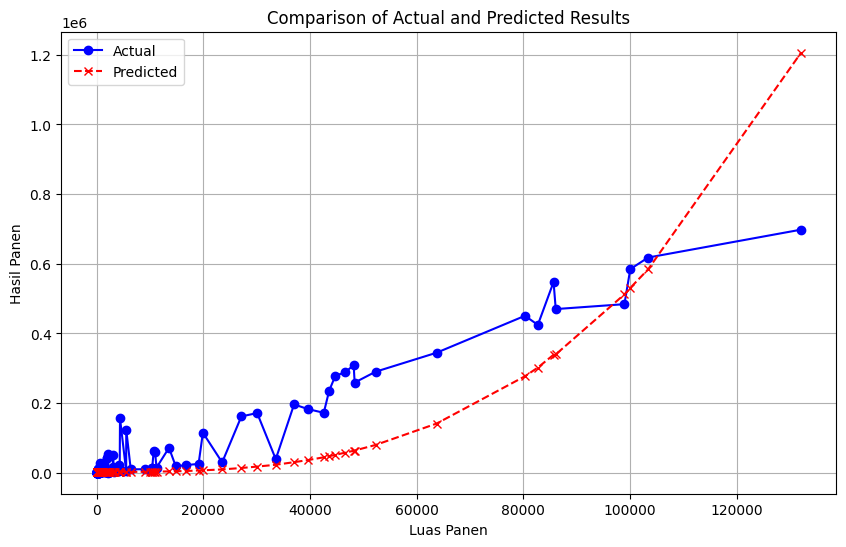

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame untuk memudahkan plotting
df_results = pd.DataFrame({
    'Luas Panen': x_test['Luas Panen'],  # Asumsikan x_test memiliki kolom 'Luas Panen'
    'Actual': y_test,
    'Predicted': svr_predict
})

# Sortir DataFrame berdasarkan Luas Panen jika belum diurutkan
df_results = df_results.sort_values('Luas Panen')

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df_results['Luas Panen'], df_results['Actual'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(df_results['Luas Panen'], df_results['Predicted'], marker='x', linestyle='--', color='r', label='Predicted')

# Memberi judul dan label
plt.title('Comparison of Actual and Predicted Results')
plt.xlabel('Luas Panen')
plt.ylabel('Hasil Panen')
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.show()

## 3.4 Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Inisialisasi model Lasso Regression
lasso_model = Lasso(alpha=0.0001)  # Anda bisa mengatur nilai alpha sesuai kebutuhan

# Melatih model
lasso_model.fit(x_train, y_train)

# Memprediksi hasil pada data uji
lasso_predict = lasso_model.predict(x_test)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Tuning parameter untuk Lasso
# lasso = Lasso()
# param_grid_lasso = {'alpha': [0.1, 1, 10, 100, 1000, 10000]}
# grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5)
# grid_search_lasso.fit(x_train, y_train)
# best_lasso = grid_search_lasso.best_estimator_
# print(f"Best Lasso Alpha: {grid_search_lasso.best_params_['alpha']}")
# print(f"Best Lasso R-Squared: {best_lasso.score(x_test, y_test)}")

In [ ]:
# Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print("R-Squared : ", r2_score(y_test, lasso_predict))
print("MSE : ", mean_squared_error(y_test, lasso_predict))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, lasso_predict)))
print("MAE : ", mean_absolute_error(y_test, lasso_predict))
print("MAPE : ", mean_absolute_percentage_error(y_test, lasso_predict))

R-Squared :  0.9491219729749022
MSE :  921212618.46441
RMSE :  30351.484617138747
MAE :  21625.699531995837
MAPE :  5.881426077333231e+18


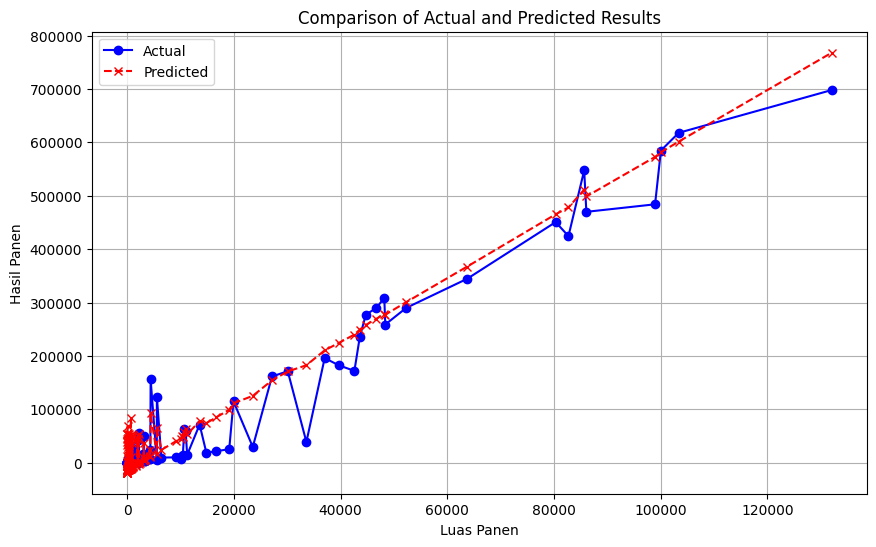

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame untuk memudahkan plotting
df_results = pd.DataFrame({
    'Luas Panen': x_test['Luas Panen'],  # Asumsikan x_test memiliki kolom 'Luas Panen'
    'Actual': y_test,
    'Predicted': lasso_predict
})

# Sortir DataFrame berdasarkan Luas Panen jika belum diurutkan
df_results = df_results.sort_values('Luas Panen')

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df_results['Luas Panen'], df_results['Actual'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(df_results['Luas Panen'], df_results['Predicted'], marker='x', linestyle='--', color='r', label='Predicted')

# Memberi judul dan label
plt.title('Comparison of Actual and Predicted Results')
plt.xlabel('Luas Panen')
plt.ylabel('Hasil Panen')
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.show()

## 3.5 XGBoost Regression

In [ ]:
import xgboost as xgb

# Inisialisasi model XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Melatih model
xgb_model.fit(x_train, y_train)

# Memprediksi hasil pada data uji
xgb_predict = xgb_model.predict(x_test)

In [ ]:
# Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print("R-Squared : ", r2_score(y_test, xgb_predict))
print("MSE : ", mean_squared_error(y_test, xgb_predict))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, xgb_predict)))
print("MAE : ", mean_absolute_error(y_test, xgb_predict))
print("MAPE : ", mean_absolute_percentage_error(y_test, xgb_predict))

R-Squared :  0.963884286798102
MSE :  653921794.373396
RMSE :  25571.89461837734
MAE :  9568.790970067745
MAPE :  3.924975234912908e+17


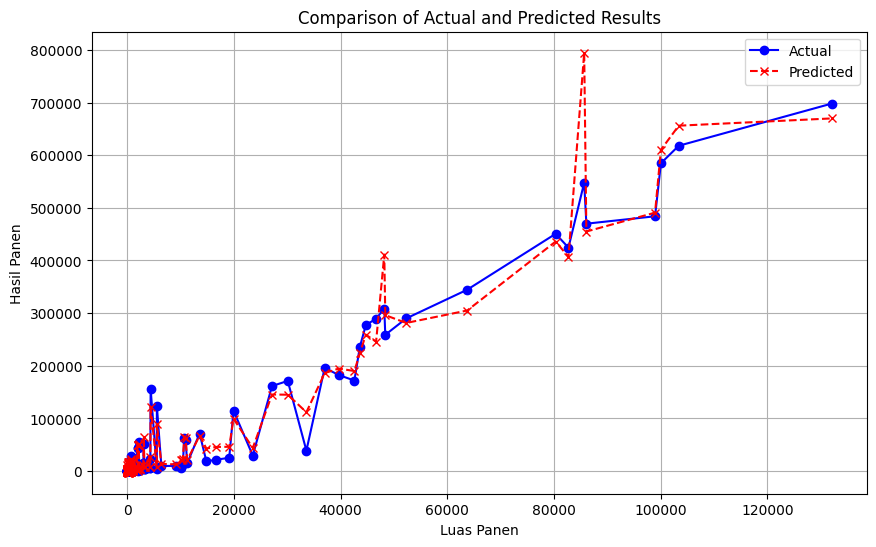

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame untuk memudahkan plotting
df_results = pd.DataFrame({
    'Luas Panen': x_test['Luas Panen'],  # Asumsikan x_test memiliki kolom 'Luas Panen'
    'Actual': y_test,
    'Predicted': xgb_predict
})

# Sortir DataFrame berdasarkan Luas Panen jika belum diurutkan
df_results = df_results.sort_values('Luas Panen')

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df_results['Luas Panen'], df_results['Actual'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(df_results['Luas Panen'], df_results['Predicted'], marker='x', linestyle='--', color='r', label='Predicted')

# Memberi judul dan label
plt.title('Comparison of Actual and Predicted Results')
plt.xlabel('Luas Panen')
plt.ylabel('Hasil Panen')
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menampilkan chart
plt.show()

## 3.6 Artificial Neural Network

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Inisialisasi model ANN
# model = Sequential()
# model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))  # Layer input dan hidden pertama
# model.add(Dense(32, activation='relu'))  # Hidden layer kedua
# model.add(Dense(1, activation='linear'))  # Output layer

# # Compile model
# model.compile(optimizer='adam', loss='mse')

# # Melatih model
# model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1)

# # Memprediksi hasil pada data uji
# ann_predict = model.predict(x_test)

In [ ]:
# # Evaluation
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# print("R-Squared : ", r2_score(y_test, ann_predict))
# print("MSE : ", mean_squared_error(y_test, ann_predict))
# print("RMSE : ", np.sqrt(mean_squared_error(y_test, ann_predict)))
# print("MAE : ", mean_absolute_error(y_test, ann_predict))
# print("MAPE : ", mean_absolute_percentage_error(y_test, ann_predict))

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Pastikan y_test dan ann_predict adalah array 1-dimensi
# y_test_flat = y_test.ravel()
# ann_predict_flat = ann_predict.ravel()

# # Membuat DataFrame untuk memudahkan plotting
# df_results = pd.DataFrame({
#     'Tahun': x_test['Tahun'],  # Asumsikan X_test memiliki kolom 'Tahun'
#     'Actual': y_test_flat,
#     'Predicted': ann_predict_flat
# })

# # Sortir DataFrame berdasarkan Tahun jika belum diurutkan
# df_results = df_results.sort_values('Tahun')

# # Membuat line chart
# plt.figure(figsize=(10, 6))
# plt.plot(df_results['Tahun'], df_results['Actual'], marker='o', linestyle='-', color='b', label='Actual')
# plt.plot(df_results['Tahun'], df_results['Predicted'], marker='x', linestyle='--', color='r', label='Predicted')

# # Memberi judul dan label
# plt.title('Comparison of Actual and Predicted Results using ANN')
# plt.xlabel('Tahun')
# plt.ylabel('Hasil Panen')
# plt.legend()

# # Menambahkan grid
# plt.grid(True)

# # Menampilkan chart
# plt.show()

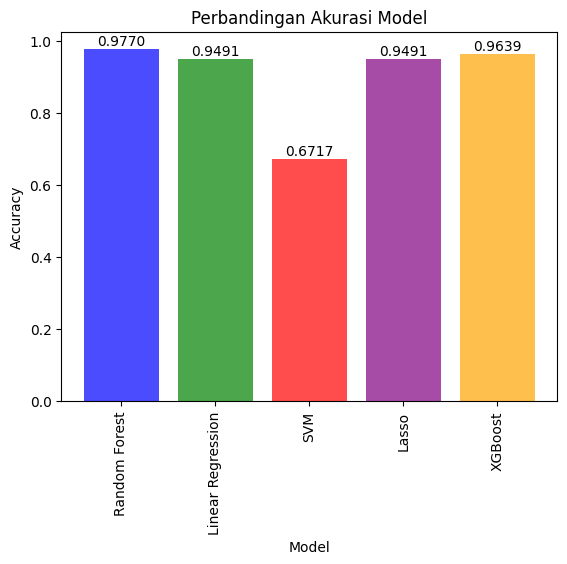

,Model,R-Squared
0,Random Forest,0.977046
1,Linear Regression,0.949122
2,SVM,0.671718
3,Lasso,0.949122
4,XGBoost,0.963884


In [ ]:
# Nama-nama model yang digunakan
model_names = ['Random Forest', 'Linear Regression', 'SVM', 'Lasso', 'XGBoost']

# Akurasi yang didapatkan dari masing-masing metode
accuracies = [
    r2_score(y_test, y_pred),
    r2_score(y_test, lr_predict),
    r2_score(y_test, svr_predict),
    r2_score(y_test, lasso_predict),
    r2_score(y_test, xgb_predict),
    # r2_score(y_test, ann_predict)
]

# Menetapkan posisi batang di sumbu X
x_pos = np.arange(len(model_names))

# Membuat diagram batang
plt.bar(x_pos, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)

# Menambahkan nilai pada setiap batang
for i in range(len(accuracies)):
    plt.text(x_pos[i], accuracies[i] + 0.01, f'{accuracies[i]:.4f}', ha='center')

# Menambahkan judul dan label
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.xticks(x_pos, model_names, rotation=90)  # Menetapkan nama model sebagai label sumbu X

# Menampilkan plot
plt.show()

r_sq_df = pd.DataFrame({
    'Model': model_names,
    'R-Squared': accuracies
})
r_sq_df

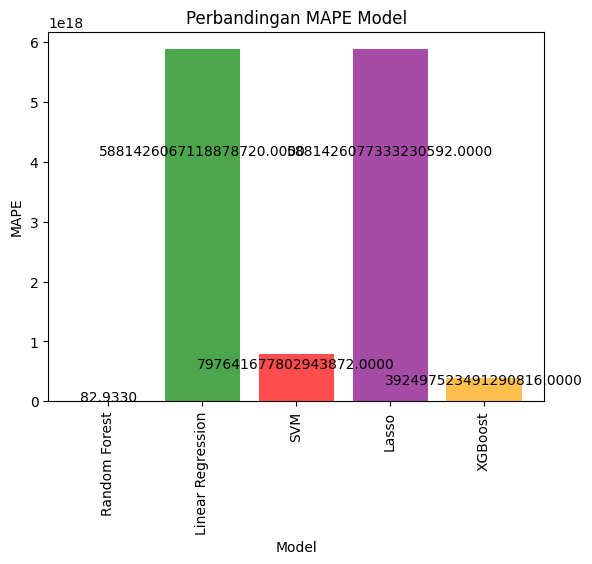

,Model,MAPE
0,Random Forest,8.293302e+01
1,Linear Regression,5.881426e+18
2,SVM,7.976417e+17
3,Lasso,5.881426e+18
4,XGBoost,3.924975e+17


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Nama-nama model yang digunakan
model_names = ['Random Forest', 'Linear Regression', 'SVM', 'Lasso', 'XGBoost']

# Menghitung MAPE untuk setiap model
mapes = [
    mean_absolute_percentage_error(y_test, y_pred),
    mean_absolute_percentage_error(y_test, lr_predict),
    mean_absolute_percentage_error(y_test, svr_predict),
    mean_absolute_percentage_error(y_test, lasso_predict),
    mean_absolute_percentage_error(y_test, xgb_predict),
    # mean_absolute_percentage_error(y_test, ann_predict)
]

# Menetapkan posisi batang di sumbu X
x_pos = np.arange(len(model_names))

# Membuat diagram batang
plt.bar(x_pos, mapes, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)

# Menambahkan nilai pada setiap batang
for i in range(len(mapes)):
    plt.text(x_pos[i], mapes[i] * 0.7, f'{mapes[i]:.4f}', ha='center')

# Menambahkan judul dan label
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.title('Perbandingan MAPE Model')
plt.xticks(x_pos, model_names, rotation=90)  # Menetapkan nama model sebagai label sumbu X

# Menampilkan plot
plt.show()

mape_df = pd.DataFrame({
    'Model': model_names,
    'MAPE': mapes
})
mape_df


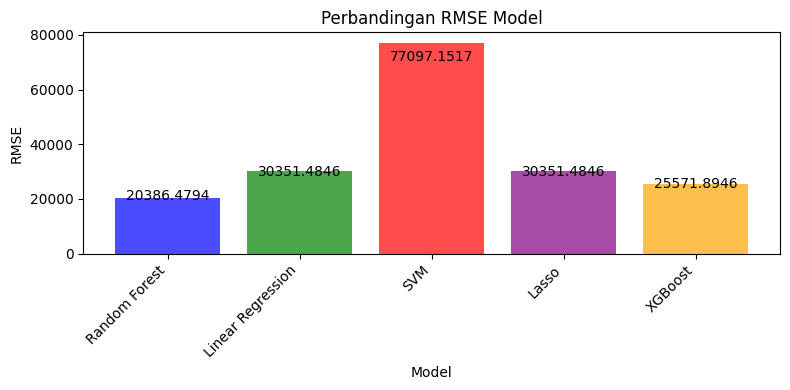

,Model,RMSE
0,Random Forest,20386.479365
1,Linear Regression,30351.484628
2,SVM,77097.151672
3,Lasso,30351.484617
4,XGBoost,25571.894618


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
import xgboost as xgb

# Misalkan y_test dan prediksi model sudah ada
# y_test = ...
# y_pred = ...
# lr_predict = ...
# svr_predict = ...
# lasso_predict = ...
# xgb_predict = ...

# Nama-nama model yang digunakan
model_names = ['Random Forest', 'Linear Regression', 'SVM', 'Lasso', 'XGBoost']

# Menghitung MSE untuk setiap model
rmses = [
    mean_squared_error(y_test, y_pred, squared=False),
    mean_squared_error(y_test, lr_predict, squared=False),
    mean_squared_error(y_test, svr_predict, squared=False),
    mean_squared_error(y_test, lasso_predict, squared=False),
    mean_squared_error(y_test, xgb_predict, squared=False),
    # mean_squared_error(y_test, ann_predict)
]

# Menetapkan posisi batang di sumbu X
x_pos = np.arange(len(model_names))

# Membuat diagram batang dengan skala logaritmik pada sumbu y
plt.figure(figsize=(8, 4))  # Mengatur ukuran plot yang lebih sesuai
plt.bar(x_pos, rmses, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)

# Menambahkan nilai pada setiap batang
for i in range(len(rmses)):
    plt.text(x_pos[i], rmses[i] * 0.9, f'{rmses[i]:.4f}', ha='center', va='bottom')  # Menempatkan teks dengan lebih baik

# Menambahkan judul dan label
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Perbandingan RMSE Model')
plt.xticks(x_pos, model_names, rotation=45, ha='right')  # Mengubah rotasi dan perataan teks

# Menampilkan plot
plt.tight_layout()  # Menyempurnakan tata letak plot
plt.show()

rmae_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmses
})
rmae_df


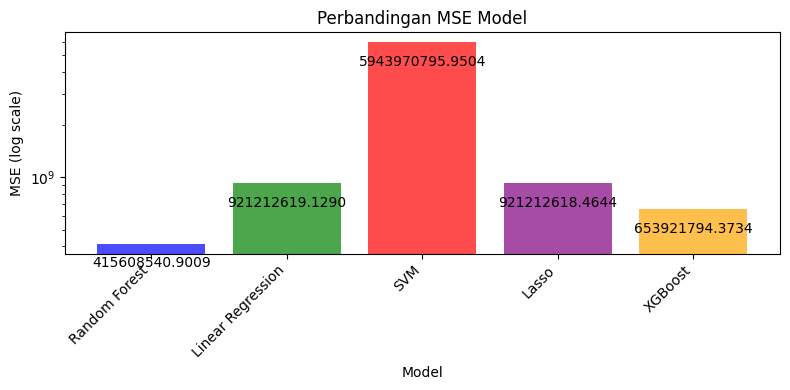

,Model,MSE
0,Random Forest,4.156085e+08
1,Linear Regression,9.212126e+08
2,SVM,5.943971e+09
3,Lasso,9.212126e+08
4,XGBoost,6.539218e+08


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
import xgboost as xgb

# Misalkan y_test dan prediksi model sudah ada
# y_test = ...
# y_pred = ...
# lr_predict = ...
# svr_predict = ...
# lasso_predict = ...
# xgb_predict = ...

# Nama-nama model yang digunakan
model_names = ['Random Forest', 'Linear Regression', 'SVM', 'Lasso', 'XGBoost']

# Menghitung MSE untuk setiap model
mses = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_test, lr_predict),
    mean_squared_error(y_test, svr_predict),
    mean_squared_error(y_test, lasso_predict),
    mean_squared_error(y_test, xgb_predict),
    # mean_squared_error(y_test, ann_predict)
]

# Menetapkan posisi batang di sumbu X
x_pos = np.arange(len(model_names))

# Membuat diagram batang dengan skala logaritmik pada sumbu y
plt.figure(figsize=(8, 4))  # Mengatur ukuran plot yang lebih sesuai
plt.bar(x_pos, mses, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)

# Menambahkan nilai pada setiap batang
for i in range(len(mses)):
    plt.text(x_pos[i], mses[i] * 0.7, f'{mses[i]:.4f}', ha='center', va='bottom')  # Menempatkan teks dengan lebih baik

# Menambahkan judul dan label
plt.xlabel('Model')
plt.ylabel('MSE (log scale)')
plt.title('Perbandingan MSE Model')
plt.xticks(x_pos, model_names, rotation=45, ha='right')  # Mengubah rotasi dan perataan teks

plt.yscale('log')  # Menggunakan skala logaritmik pada sumbu y

# Menampilkan plot
plt.tight_layout()  # Menyempurnakan tata letak plot
plt.show()

# Membuat dataframe untuk perbandingan MAE
mse_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mses
})
mse_df

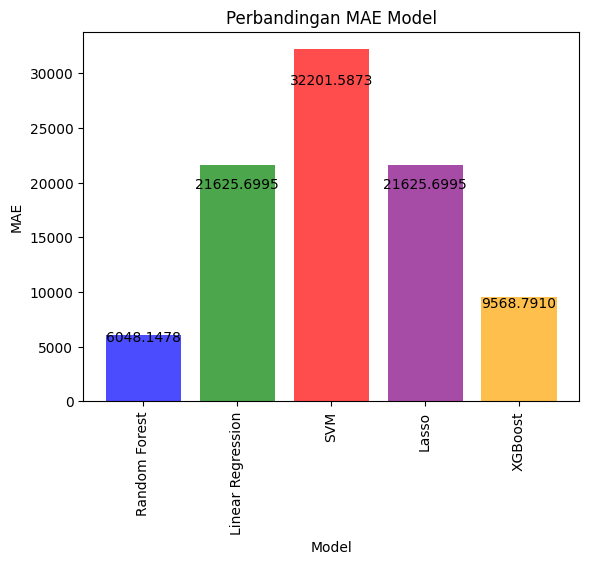

,Model,MAE
0,Random Forest,6048.147763
1,Linear Regression,21625.699536
2,SVM,32201.587250
3,Lasso,21625.699532
4,XGBoost,9568.790970


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
import xgboost as xgb

# Misalkan y_test dan prediksi model sudah ada
# y_test = ...
# y_pred = ...
# lr_predict = ...
# svr_predict = ...
# lasso_predict = ...
# xgb_predict = ...

# Nama-nama model yang digunakan
model_names = ['Random Forest', 'Linear Regression', 'SVM', 'Lasso', 'XGBoost']

# Menghitung MAE untuk setiap model
maes = [
    mean_absolute_error(y_test, y_pred),
    mean_absolute_error(y_test, lr_predict),
    mean_absolute_error(y_test, svr_predict),
    mean_absolute_error(y_test, lasso_predict),
    mean_absolute_error(y_test, xgb_predict),
    # mean_absolute_error(y_test, ann_predict)
]

# Menetapkan posisi batang di sumbu X
x_pos = np.arange(len(model_names))

# Membuat diagram batang
plt.bar(x_pos, maes, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)

# Menambahkan nilai pada setiap batang
for i in range(len(maes)):
    plt.text(x_pos[i], maes[i] * 0.9, f'{maes[i]:.4f}', ha='center')

# Menambahkan judul dan label
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Perbandingan MAE Model')
plt.xticks(x_pos, model_names, rotation=90)  # Menetapkan nama model sebagai label sumbu X

# Menampilkan plot
plt.show()


# Membuat dataframe untuk perbandingan MAE
mae_df = pd.DataFrame({
    'Model': model_names,
    'MAE': maes
})
mae_df


In [ ]:
pd.DataFrame({
    'Tanaman': x_test['Tanaman'],  # Asumsikan X_test memiliki kolom 'Tanaman'
    'Humidity': x_test['Humidity'],  # Asumsikan X_test memiliki kolom 'Humidity'
    'Luas Panen': x_test['Luas Panen'],  # Asumsikan X_test memiliki kolom 'Luas Panen'
    'Actual': y_test.ravel(),
    'Random Forest Prediction': y_pred.ravel(),
    'Linear Regression Prediction': lr_predict.ravel(),
    'SVM Prediction': svr_predict.ravel(),
    'Lasso Prediction': lasso_predict.ravel(),
    'XGBoost Prediction': xgb_predict.ravel(),
})

,Tanaman,Humidity,Luas Panen,Actual,Random Forest Prediction,Linear Regression Prediction,SVM Prediction,Lasso Prediction,XGBoost Prediction
663,6,79.000000,10.0,253.000,243.321947,43814.547654,2184.382126,43814.547637,2490.830078
594,7,74.000000,4404.0,156300.000,137661.365836,92647.251425,2311.090753,92647.251318,122594.640625
148,1,85.000000,4221.0,23414.732,25174.472382,23747.899578,2252.181163,23747.899515,27613.109375
667,5,82.889213,52315.0,289998.000,289060.291726,300764.030038,79720.427962,300764.030107,281397.187500
577,2,75.814815,64.5,70.000,97.042991,-13011.912875,2184.386500,-13011.912969,-704.779907
...,...,...,...,...,...,...,...,...,...
493,4,81.531250,1626.0,2365.000,2405.956451,-5455.465788,2189.821479,-5455.465700,3543.261230
124,5,78.888889,39673.0,182544.510,191619.683827,224334.702352,36396.071933,224334.702390,194850.250000
279,0,79.037037,107.0,77.417,131.693363,-11133.245393,2184.395231,-11133.245550,-1179.888550
644,6,79.000000,29.0,638.000,701.839688,34094.091357,2184.384443,34094.091369,2057.805664
